# Prediction using Unsupervised ML
**Aim:** From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

**Data Source:** https://bit.ly/3kXTdox

**Author:** <a href= 'https://github.com/Devvrat53'>Devvrat Mungekar</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
df = pd.read_csv("iris.csv")
del df['Id']
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# No of flowers present in our dataset
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

There are 4 species in the flower: **Setosa, Versicolor, Virginica**

In [5]:
X = df.iloc[:, :4].values
wcss = []

for i in range(1, 12):
    kmeans = KMeans(n_clusters= i, init= 'k-means++', random_state= i).fit(X)
    wcss.append(kmeans.inertia_) # sum of squares of distances of samples between the closest cluster centers

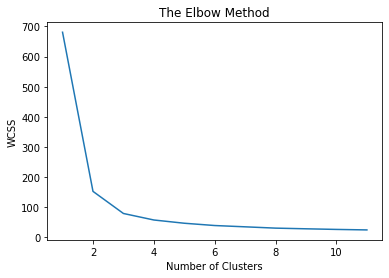

In [6]:
# Plotting the Elbow Method
plt.plot(range(1, 12), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

The optimum number of cluster forms where the elbow occurs in the elbow method

In [7]:
kmeans = KMeans(n_clusters= 3, init= 'k-means++', random_state=3)
y_kmeans = kmeans.fit_predict(X)

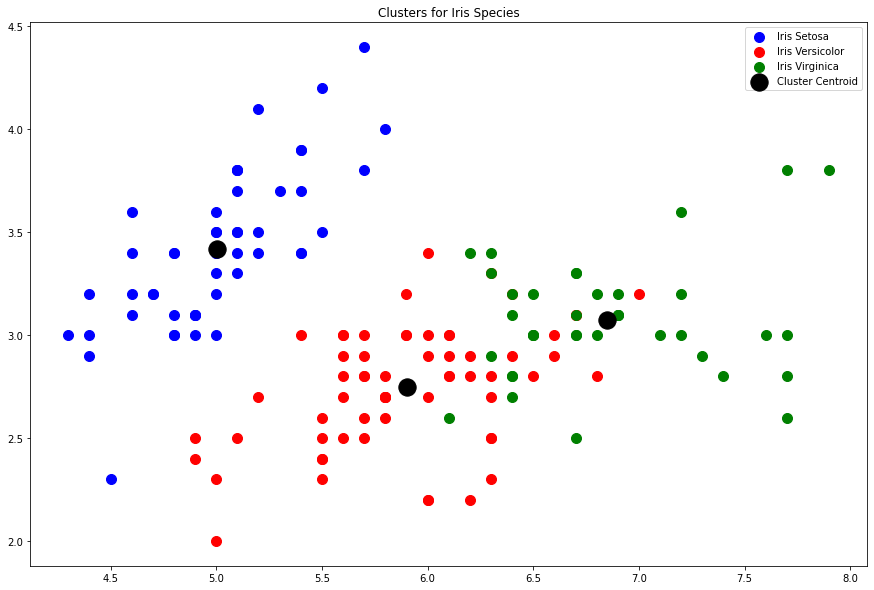

In [8]:
plt.figure(figsize= (15, 10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s= 100, c= 'blue', label= 'Iris Setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s= 100, c= 'red', label= 'Iris Versicolor')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s= 100, c= 'green', label= 'Iris Virginica')

# Plotting the centroid
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s= 300, c= 'black', label= 'Cluster Centroid')
plt.title("Clusters for Iris Species")
plt.legend()
plt.show()